# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# Mengumpulkan dan memuat dataset csv
df = pd.read_csv('/content/top_15_countries_climate.csv')
df.head()

,year,month,country,region,avg_temp_c,precipitation_mm,air_quality_index,uv_index,malaria_cases,dengue_cases,population_density,healthcare_budget
0,2000,1,Palestinian Territory,Central,28.132468,152.083870,110.487231,12.000000,53,145,113,1068
1,2000,2,Palestinian Territory,Central,30.886500,119.591418,83.467928,12.000000,132,48,113,1068
2,2000,3,Palestinian Territory,Central,31.366433,95.876124,93.095292,12.000000,34,80,113,1068
3,2000,4,Palestinian Territory,Central,28.481870,175.315731,105.530192,9.395894,23,133,113,1068
4,2000,5,Palestinian Territory,Central,26.890370,191.445990,60.205979,9.935726,39,74,113,1068


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
# 1. Memahami struktur data
print("Jumlah Baris dan Kolom :", df.shape)
print("\nTipe Data :\n", df.dtypes)

Jumlah Baris dan Kolom : (4320, 12)

Tipe Data :
 year                    int64
month                   int64
country                object
region                 object
avg_temp_c            float64
precipitation_mm      float64
air_quality_index     float64
uv_index              float64
malaria_cases           int64
dengue_cases            int64
population_density      int64
healthcare_budget       int64
dtype: object


In [5]:
# 2. Menangani data yang hilang
print("\nData yang Hilang :\n", df.isnull().sum())


Data yang Hilang :
 year                  0
month                 0
country               0
region                0
avg_temp_c            0
precipitation_mm      0
air_quality_index     0
uv_index              0
malaria_cases         0
dengue_cases          0
population_density    0
healthcare_budget     0
dtype: int64


Karena terlihat tidak adanya missing value pada dataset yang digunakan maka dataset equipment_csv siap untuk digunakan

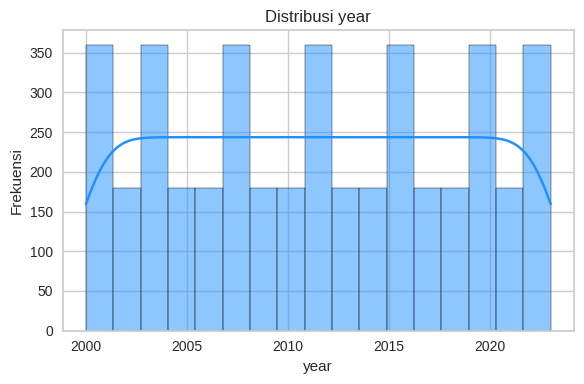

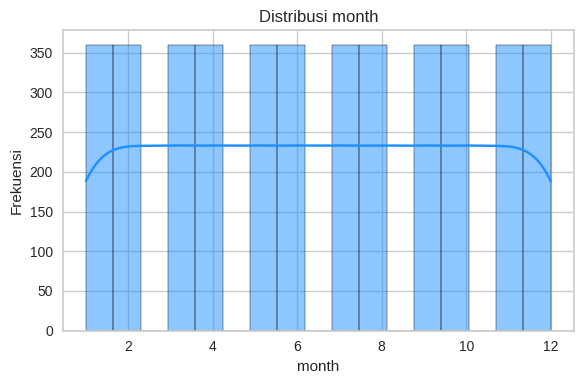

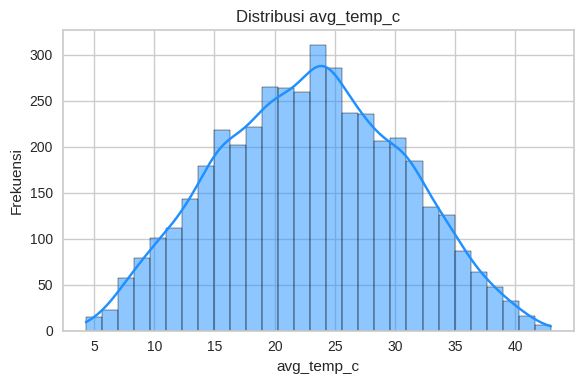

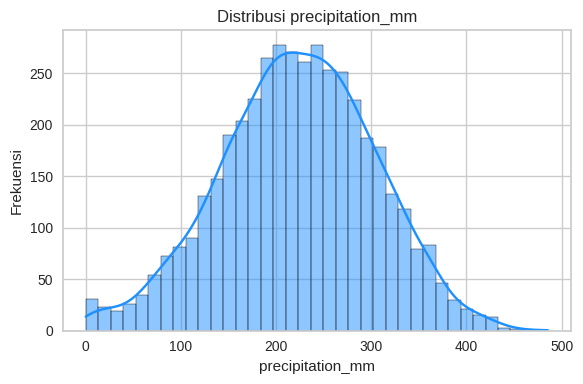

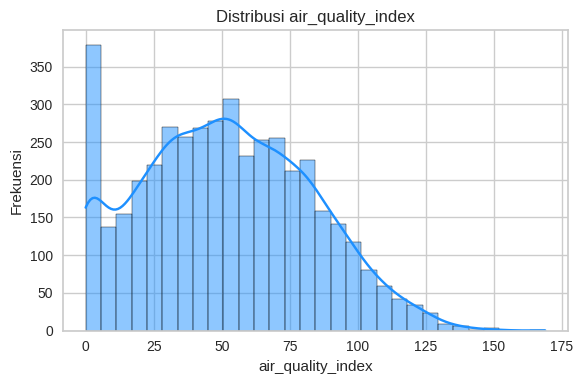

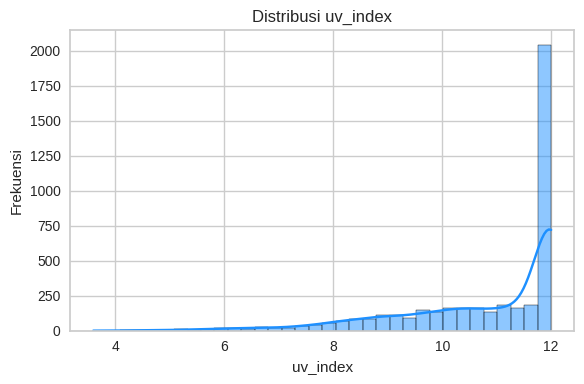

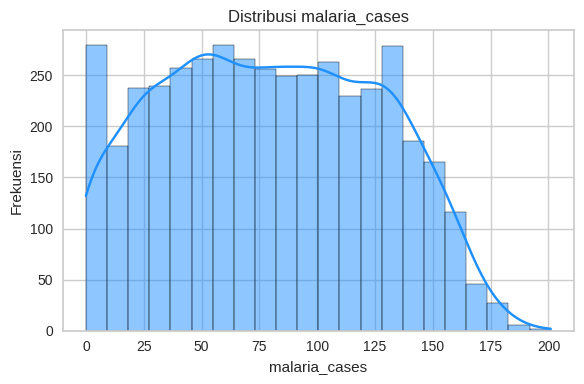

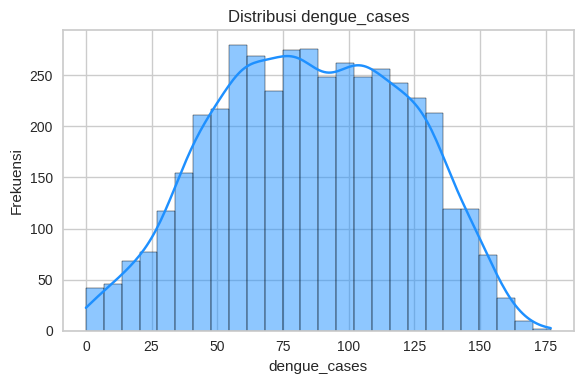

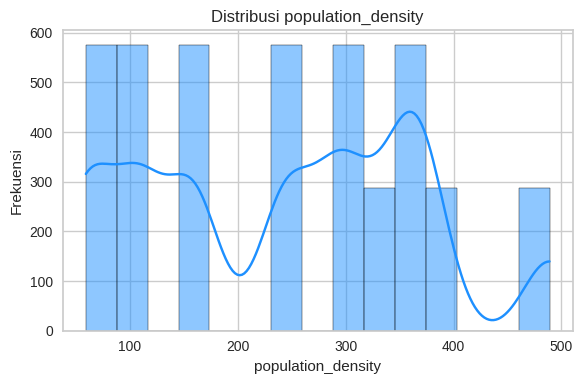

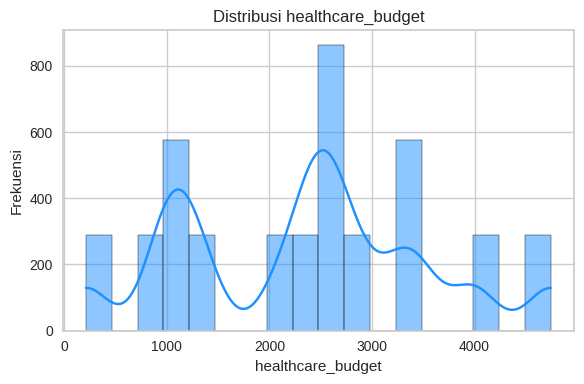

In [6]:
# 3. Analisis distribusi dan korelasi
# Membuat histogram untuk distribusi variabel numerik keseluruhan
df_numeric = df.select_dtypes(include=['float64', 'int64'])

for col in df_numeric:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='dodgerblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()

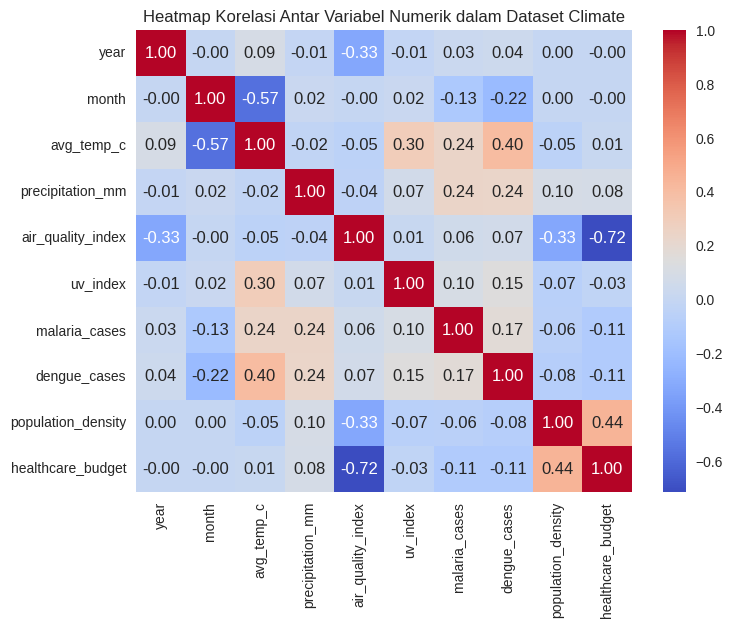

In [7]:
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Antar Variabel Numerik dalam Dataset Climate")
plt.show()

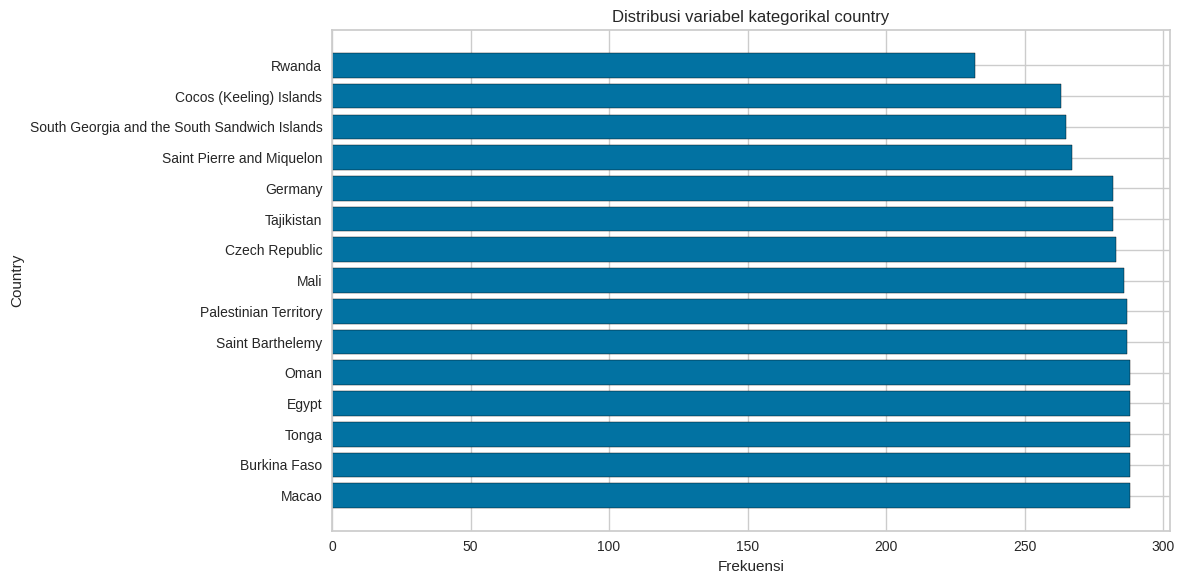

In [33]:
# 4. Visualisasi Data Kategorikal
plt.figure(figsize=(12, 6))

# Country
top_country_counts = df['country'].value_counts()
plt.barh(top_country_counts.index, top_country_counts.values, edgecolor='black')
plt.title('Distribusi variabel kategorikal country')
plt.xlabel('Frekuensi')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

*Dibuat kesamping untuk mudah dibaca karena banyaknya jumlah negara

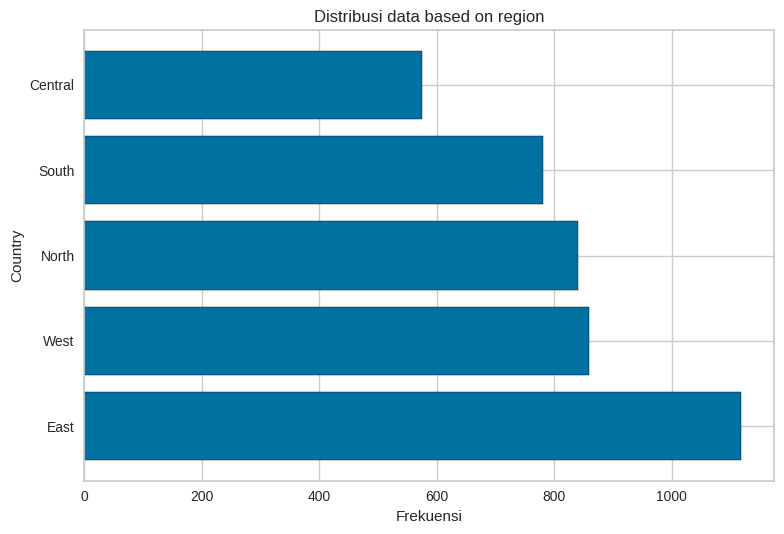

In [34]:
# Country
top_country_counts = df['region'].value_counts()
plt.barh(top_country_counts.index, top_country_counts.values, edgecolor='black')
plt.title('Distribusi data based on region')
plt.xlabel('Frekuensi')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [10]:
# Memeriksa apakah terdapat missing value
df.isna().sum()

,0
year,0
month,0
country,0
region,0
avg_temp_c,0
precipitation_mm,0
air_quality_index,0
uv_index,0
malaria_cases,0
dengue_cases,0


In [11]:
# Menghapus duplikasi data
print("Jumlah duplikasi : ", df.duplicated().sum())

Jumlah duplikasi :  0


In [12]:
# Penanganan outlier dataset yang akan digunakan (Metode IQR)
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        before = df.shape[0]
        df = df[(df[col] >= lower) & (df[col] <= upper)]
        after = df.shape[0]
        print(f"Outlier di '{col}': {before - after} dihapus")
    return df

fitur_numerik = df.select_dtypes(include='number').columns.tolist()
df = remove_outliers_iqr(df, fitur_numerik)


Outlier di 'year': 0 dihapus
Outlier di 'month': 0 dihapus
Outlier di 'avg_temp_c': 0 dihapus
Outlier di 'precipitation_mm': 22 dihapus
Outlier di 'air_quality_index': 4 dihapus
Outlier di 'uv_index': 120 dihapus
Outlier di 'malaria_cases': 0 dihapus
Outlier di 'dengue_cases': 0 dihapus
Outlier di 'population_density': 0 dihapus
Outlier di 'healthcare_budget': 0 dihapus


In [13]:
# Encoding Kategorikal

en_country = LabelEncoder()
en_region = LabelEncoder()

# Transformasi data kategorikal ke dalam bentuk numerik
df['en_country'] = en_country.fit_transform(df['country'])
df['en_region'] = en_region.fit_transform(df['region'])

# Menampilkan beberapa baris pertama sebelum & sesudah encoding
df[['country', 'en_country', 'region', 'en_region']].head(10)

,country,en_country,region,en_region
0,Palestinian Territory,8,Central,0
1,Palestinian Territory,8,Central,0
2,Palestinian Territory,8,Central,0
3,Palestinian Territory,8,Central,0
4,Palestinian Territory,8,Central,0
5,Palestinian Territory,8,Central,0
6,Palestinian Territory,8,Central,0
7,Palestinian Territory,8,Central,0
8,Palestinian Territory,8,Central,0
9,Palestinian Territory,8,Central,0


In [14]:
# Pengelompokan Fitur
# Berdasarkan kualitas udara
df['air_level'] = pd.cut(df['air_quality_index'], bins=[0, 50, 100, 200], labels=['Good', 'Moderate', 'Unhealthy'])
df['air_level'].head(10)

,air_level
0,Unhealthy
1,Moderate
2,Moderate
3,Unhealthy
4,Moderate
5,Moderate
6,Unhealthy
7,Unhealthy
8,Moderate
9,Unhealthy


In [36]:
# Standarisasi Numerical
numerical = ['avg_temp_c', 'precipitation_mm', 'air_quality_index', 'malaria_cases', 'dengue_cases', 'population_density', 'healthcare_budget']
scaler = StandardScaler()
df[numerical] = scaler.fit_transform(df[numerical])

In [37]:
# Pemilihan fitur yang akan digunakan dalam model
features = ['avg_temp_c', 'precipitation_mm', 'air_quality_index', 'malaria_cases', 'dengue_cases', 'en_country', 'en_region', 'population_density', 'healthcare_budget']
df_selected = df[features]

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

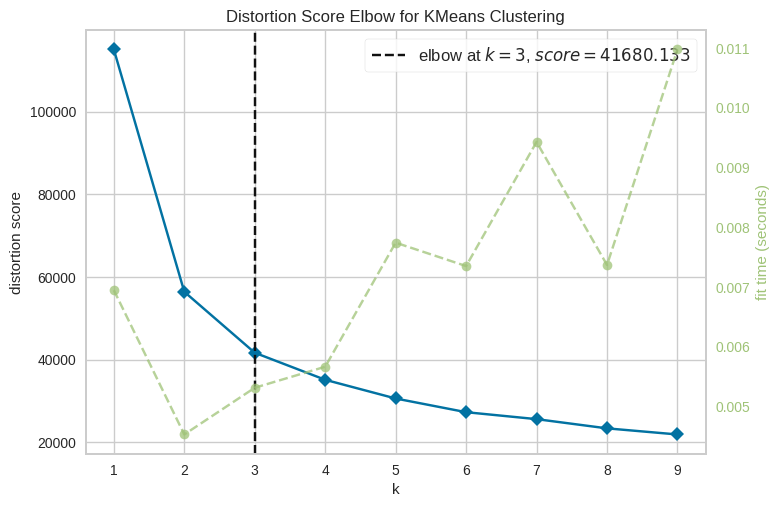

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
# Menentukan algoritma dan cluster
# Mencari jumlah cluster terbaik dahulu
kmeans = KMeans()

visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(df_selected)
visualizer.show()

In [41]:
# Melatih model
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster = kmeans.fit_predict(df_selected)
df['Cluster'] = cluster

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [42]:
# Menampilkan silhouette score untuk evaluasi
score = silhouette_score(df_selected, df['Cluster'])
print("Silhouette Score:", score)

Silhouette Score: 0.32512555892243755


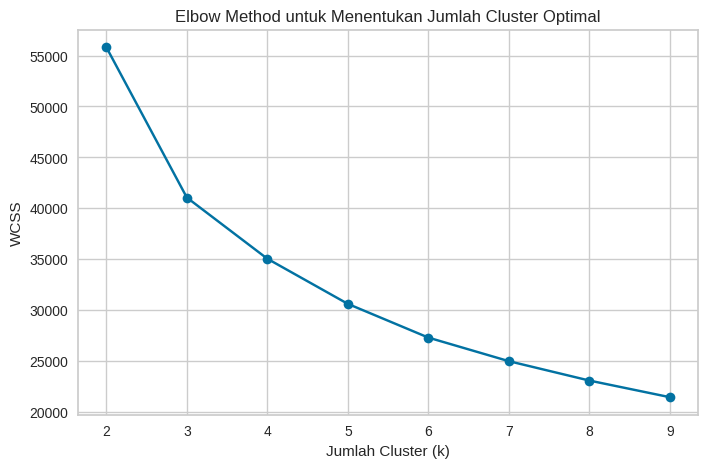

In [40]:
# Mengevaluasi jumlah cluster optimal dengan elbow method
wcss = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(df_selected)
    wcss.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method untuk Menentukan Jumlah Cluster Optimal")
plt.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

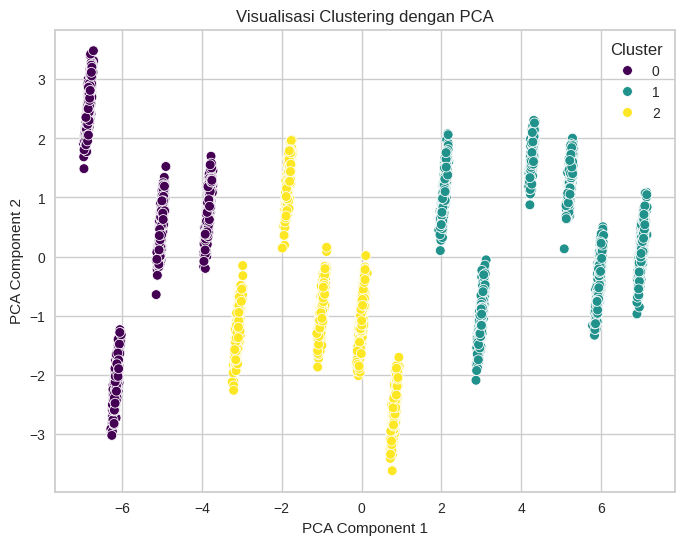

In [43]:
# Visualisasi hasil clustering dengan PCA 2D projection
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_selected)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster'], palette='viridis', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Visualisasi Clustering dengan PCA')
plt.legend(title='Cluster')
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [22]:
# Menambahkan hasil label cluster ke Data frame
cluster = kmeans.labels_

In [23]:
# Melakukan inverse data yang telah di transformasi
df['country'] = en_country.inverse_transform(df['en_country'])
df['region'] = en_region.inverse_transform(df['en_region'])

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [24]:
# Mengembalikan data ke skala aslinya
df[numerical] = scaler.inverse_transform(df[numerical])

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [31]:
# Menampilkan hasil clustering numerikal yang dibulatkan
numerical = ['avg_temp_c', 'precipitation_mm', 'air_quality_index', 'malaria_cases', 'dengue_cases', 'population_density', 'healthcare_budget']

# Grouping berdasarkan Cluster dan menghitung min, max, mean
df_summary = df.groupby("Cluster")[numerical].agg(["min", "max", "mean"]).round(2)

# Loop per fitur untuk menampilkan dalam bentuk tabel
for feature in numerical:
    df_feature_num = df_summary[feature].reset_index()
    df_feature_num.columns = ['Cluster', f'{feature}_min', f'{feature}_max', f'{feature}_mean']

    print(f"\n{feature}")
    print(df_feature_num)



avg_temp_c
   Cluster  avg_temp_c_min  avg_temp_c_max  avg_temp_c_mean
0        0            4.32           42.93            23.97
1        1            4.45           42.34            21.40
2        2            9.44           41.73            24.39

precipitation_mm
   Cluster  precipitation_mm_min  precipitation_mm_max  precipitation_mm_mean
0        0                 48.48                443.11                 230.71
1        1                  5.59                437.53                 225.28
2        2                 11.61                423.96                 217.71

air_quality_index
   Cluster  air_quality_index_min  air_quality_index_max  \
0        0                    0.0                 142.21   
1        1                    0.0                 139.18   
2        2                    0.0                 133.67   

   air_quality_index_mean  
0                   59.47  
1                   41.18  
2                   56.37  

malaria_cases
   Cluster  malaria_cases_min  

In [26]:
# Menampilkan modus kolom kategorikal
# Menentukan kolom kategorikal
categorical_columns = ['region', 'country']

# Menghitung modus tiap cluster
modus = df.groupby('Cluster')[categorical_columns].agg(pd.Series.mode)

# Menampilkan hasil modus
print(modus)

          region                country
Cluster                                
0           West  [Burkina Faso, Egypt]
1          South                  Tonga
2        Central          [Macao, Oman]


Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.


## Cluster 0:
- **Rata-rata Suhu (°C):** 23.97  
- **Rata-rata Curah Hujan (mm):** 230.71  
- **Rata-rata Indeks Kualitas Udara (AQI):** 230.71  
- **Rata-rata Kasus Malaria:** 84.24
- **Rata-rata Kasus Demam Berdarah:** 90.33
- **Kasus Demam Berdarah Rata-rata:** 84.24  
- **Kepadatan Penduduk Rata-rata:** 201.76  
- **Rata-rata Anggaran Kesehatan:** \$1,909.66
- **Wilayah:** West  
- **Negara:** Burkina Faso, Egypt  

**Analisis:**  
Cluster ini menunjukkan wilayah dengan suhu cukup tinggi dan curah hujan sedang. Kualitas udara cenderung buruk (tinggi), yang bisa menjadi indikasi adanya polusi atau faktor lingkungan yang kurang sehat. Rata-rata kasus penyakit tropis seperti malaria dan demam berdarah cukup tinggi, meskipun anggaran kesehatan relatif sedang. Ini mengindikasikan kebutuhan akan perhatian lebih terhadap pengendalian penyakit dan peningkatan kualitas udara di wilayah ini.



## Cluster 1:
- **Rata-rata Suhu (°C):** 21.40  
- **Rata-rata Curah Hujan (mm):** 225.28
- **Rata-rata Indeks Kualitas Udara (AQI):** 225.28  
- **Rata-rata Kasus Malaria:** 75.65
- **Rata-rata Kasus Demam Berdarah:** 80.96  
- **Kasus Demam Berdarah Rata-rata:** 84.24  
- **Kepadatan Penduduk Rata-rata:** 253.43
- **Rata-rata Anggaran Kesehatan:** \$2,896.84
- **Wilayah:** South  
- **Negara:** Tonga  

**Analisis:**  
Wilayah dalam cluster ini memiliki suhu yang sedikit lebih rendah dengan curah hujan dan kualitas udara yang kurang baik. Namun, cluster ini mencatat anggaran kesehatan tertinggi di antara cluster lainnya, yang menunjukkan bahwa negara-negara dalam cluster ini memiliki kapasitas dan prioritas lebih tinggi dalam investasi kesehatan. Meskipun demikian, kasus penyakit tropis masih cukup tinggi, menandakan bahwa upaya pengendalian perlu terus diperkuat.




## Cluster 2:
- **Rata-rata Suhu (°C):** 24.39  
- **Rata-rata Curah Hujan (mm):** 217.71
- **Rata-rata Indeks Kualitas Udara (AQI):** 217.71  
- **Rata-rata Kasus Malaria:** 82.53
- **Rata-rata Kasus Demam Berdarah:** 89.05  
- **Kasus Demam Berdarah Rata-rata:** 84.24  
- **Kepadatan Penduduk Rata-rata:** 259.81
- **Rata-rata Anggaran Kesehatan:** \$2055.60
- **Wilayah:** Central  
- **Negara:** Macao, Oman  

**Analisis:**  
Cluster ini memiliki suhu dan kasus penyakit yang tinggi, dengan curah hujan dan kualitas udara sedikit lebih baik dibanding cluster lain. Kepadatan penduduk yang tinggi dapat menjadi salah satu faktor tingginya persebaran penyakit. Walaupun anggaran kesehatan lebih tinggi dibanding Cluster 0, tetap diperlukan program kesehatan masyarakat yang intensif untuk mengurangi dampak lingkungan tropis yang mendukung penyebaran penyakit.

**Kesimpulan**
Setiap cluster mewakili karakteristik wilayah yang berbeda dengan variasi suhu, curah hujan, kualitas udara, dan beban penyakit tropis. Cluster 1 unggul dari segi anggaran kesehatan, namun tetap mengalami beban penyakit yang cukup tinggi. Sedangkan cluster 0 dan 2 memiliki kondisi lingkungan lebih berat (tinggi suhu & penyakit) tetapi dengan anggaran yang relatif lebih rendah. Sehingga data ini dapat digunakan untuk perencanaan kesehatan lingkungan dan strategi pengendalian penyakit berbasis wilayah.


# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [27]:
# Menyimpan hasil cluster ke dalam CSV
df.to_csv("hasil_clustering.csv", index=False)